# Task-1_Prediction using Supervised ML

Objective:Predict the percentage of an student based on the no. of study hours.


# Importing Required Libraries


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reading the data From the source


In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data Sucessfully Imported")
s_data.head(10)

Data Sucessfully Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Ploting Input Data


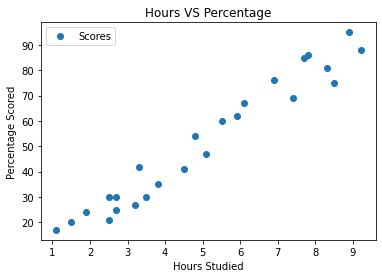

In [6]:
s_data.plot(x='Hours', y='Scores' , style ='o')
plt.title('Hours VS Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

# Preprocessing the Data

In this step we divide our data into "Attributes"(Input) and "Labels"(Output)

In [24]:
X = s_data.iloc[:,:-1].values
y = s_data.iloc[:,1].values

# Training

In this step we divide the data into training and testing sets and train the algorithm 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Training Complete")

Training Complete


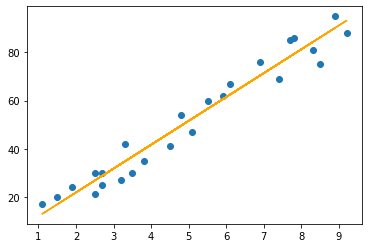

In [26]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line, color='orange');
plt.show()

# Making Predictions

Now that we have trained our algorithm inprevious step its time to test it using test set and check if the predictions are correct

In [28]:
print(X_test)
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [46]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


### Plotting The Actual And Predicted result to Compare 

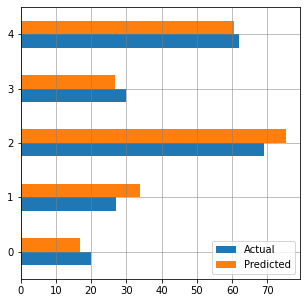

In [48]:
df.plot(kind='barh',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='grey')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

### Testing the model with our own data

In [44]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [45]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.